In [111]:
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.pyplot import figure

# Options set
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", 0)

# Default theme for matplotlib set
sns.set_theme()

In [112]:
# Database engine is created
engine = sa.create_engine('mssql://GBWADJ8HJ293/LIMS?driver=SQL+Server+Native+Client+10.0?trusted_connection=yes')

# Dataframe is read from database
#df=pd.read_sql("SELECT * FROM TRIAL WHERE Lot= 'PR18900' AND Pallet=1", engine)
df=pd.read_sql("SELECT * FROM TRIAL WHERE Product='SORB-AC43'", engine)

# Dataframe is inspected to ensure data has been read properly
df=df[["Date", "Lot", "Pallet","Fe_TM01a"]]
df

,Date,Lot,Pallet,Fe_TM01a
0,2018-01-01 07:00:00,MR18040,1,240
1,2018-01-01 09:00:00,MR18040,2,None
2,2018-01-01 11:00:00,MR18040,4,None
3,2018-01-01 13:00:00,MR18040,6,None
4,2018-01-01 15:00:00,MR18040,7,None
...,...,...,...,...
7961,2021-07-08 19:00:00,AP21173,31,None
7962,2021-07-08 23:00:00,AP21173,39,None
7963,2021-07-09 03:05:00,AP21173,48,None
7964,2021-07-09 07:00:00,AP21174,5,None


In [113]:
df.dropna(subset=["Fe_TM01a"], inplace=True)


In [114]:
df["Fe_TM01a"]=pd.to_numeric(df["Fe_TM01a"])


,Date,Lot,Pallet,Fe_TM01a
0,2018-01-01 07:00:00,MR18040,1,240.0
12,2018-01-02 07:00:00,MR18041,4,210.0
21,2018-01-03 07:00:00,MR18042,4,235.0
27,2018-01-04 07:00:00,MR18043,4,218.0
28,2018-01-04 11:00:00,PT17177,261,237.0
...,...,...,...,...
7726,2021-05-29 15:00:00,MR21140,1,268.0
7771,2021-06-04 07:00:00,MR21146,4,288.0
7820,2021-06-16 04:00:00,AP21153,1,275.0
7872,2021-06-23 07:00:00,AP21160,5,275.0


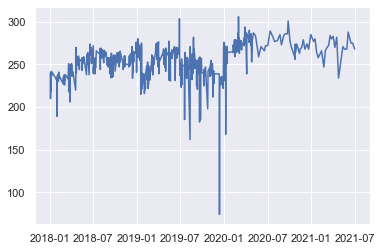

In [115]:
fig, ax = plt.subplots()
plt.plot(df["Date"], df["Fe_TM01a"])
plt.show()

In [116]:
# filt=df["Al2O3_TM01a"]>600

In [117]:
# df=df[filt]

In [118]:
df["Fe_TM01a"].min()

74.12000275

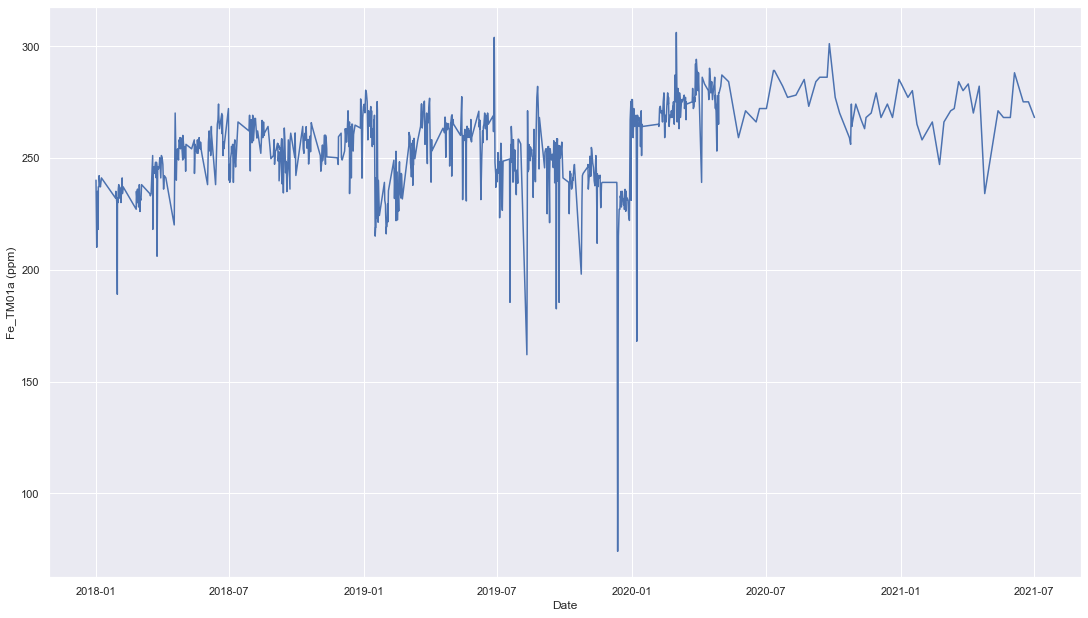

<Figure size 2000x2000 with 0 Axes>

In [122]:
fig, ax =plt.subplots()
plt.plot(df["Date"], df["Fe_TM01a"])
plt.xlabel("Date")
plt.ylabel("Fe_TM01a (ppm)")
figure(figsize=(20, 20), dpi=100)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()